In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Step 2: Load Dataset
data = pd.read_csv('/content/Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Step 3: Preprocess Data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Optional: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

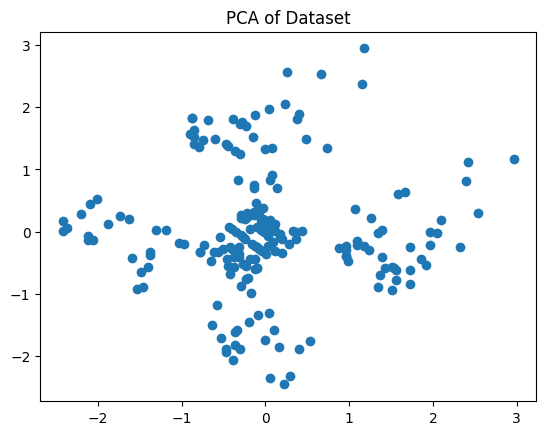

In [7]:
# Step 4: Visualize (Optional: Reduce to 2D using PCA)
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA of Dataset')
plt.show()

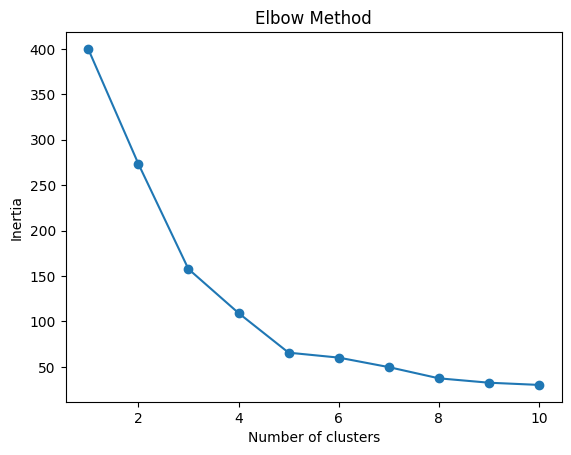

In [8]:
# Step 5: Use Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Step 6: Fit K-Means (use optimal K, let's say K=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
# Step 7: Add Cluster Labels to Data
data['Cluster'] = clusters

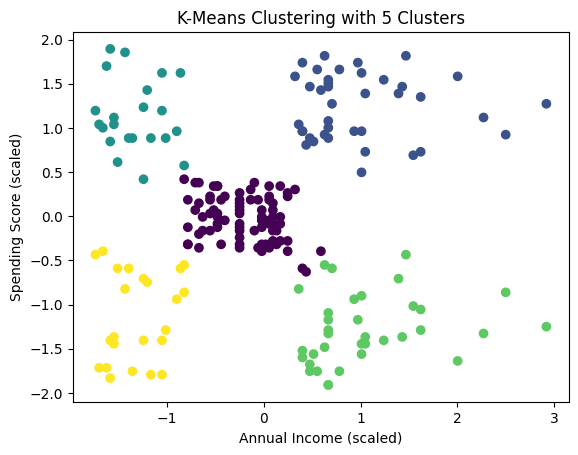

In [11]:
# Step 8: Visualize Clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [12]:
# Step 9: Evaluate Clustering
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.55
